In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /home/dh3553/projects/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Student_Performance_Por'
EXPERIMENT_SESSION_UUID = 'b35e31f2-bb03-494f-a24c-b9264e383667'
SENSITIVE_ATTRS = ['sex']
# MODEL_NAMES = ['LogisticRegression']
MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(72, 21)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,0.938650,0.957447,1.000000,0.00000,0.913043,1.000000,0.000000,0
19,F1,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,0.963504,0.975309,1.000000,0.00000,0.946429,1.000000,0.000000,0
38,FNR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,0.036496,0.048193,0.000000,1.00000,0.018519,0.000000,1.000000,0
57,FPR,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,0.192308,0.000000,0.000000,NaN,0.333333,0.000000,1.000000,0
76,Jitter,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,0.054744,0.041647,0.032229,0.25353,0.072586,0.063859,0.164221,0
95,Label_Stability,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,0.925521,0.947660,0.958778,0.69750,0.895362,0.904762,0.796667,0
114,PPV,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,0.963504,1.000000,1.000000,NaN,0.913793,1.000000,0.000000,0
133,Positive-Rate,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,1.000000,0.951807,1.000000,0.00000,1.074074,1.000000,5.000000,0
152,Sample_Size,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,163.000000,94.000000,90.000000,4.00000,69.000000,63.000000,6.000000,0
171,Selection-Rate,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",Student_Performance_Por,200,OK,2024-01-04 11:14:08.099,b35e31f2-bb03-494f-a24c-b9264e383667,Exp_iter_1,100,...,[True],True,0.840491,0.840426,0.877778,0.00000,0.840580,0.841270,0.833333,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 864x432 with 0 Axes>

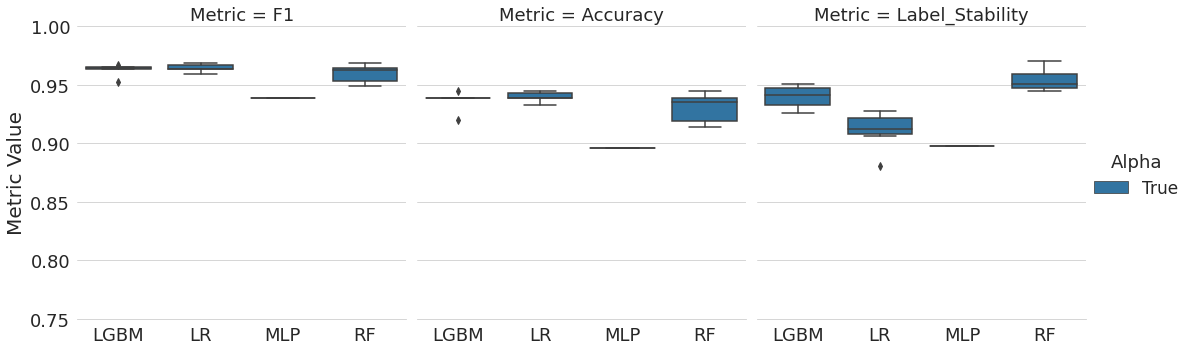

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 864x432 with 0 Axes>

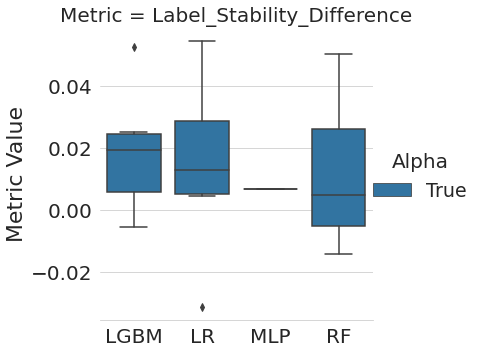

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

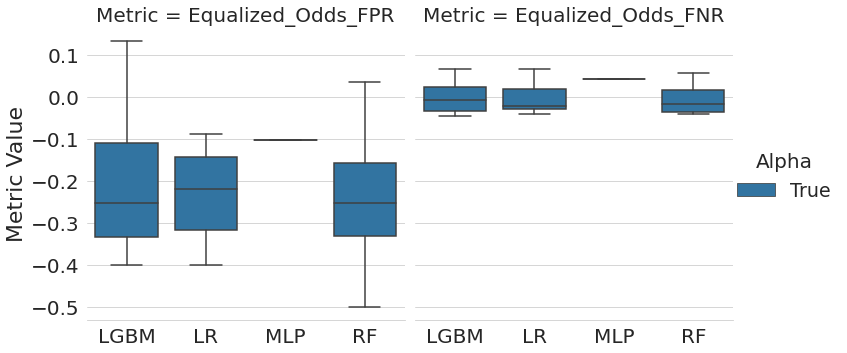

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

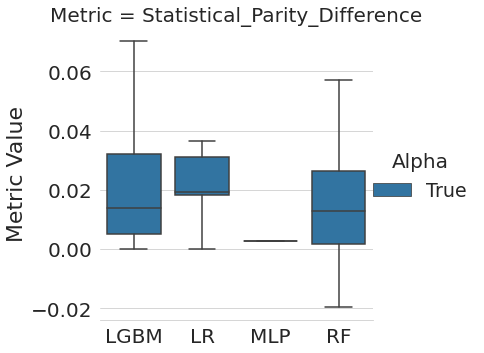

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)